Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Idrisova Alexandra"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [2]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    fder=(f(x+h)-f(x-h))/(2*h)
    return fder

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 --  0.0001
0.001000 --   1e-06
0.000100 --   1e-08
0.000010 --   1e-10


Можно сказать, что совпадает, так как при h=1e-5 результат оказывается очень близким к нулю.

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

Для двухточечной схемы: h=2.71858824273294e-09
Для трехточечной схемы: h=1.0476157527896661


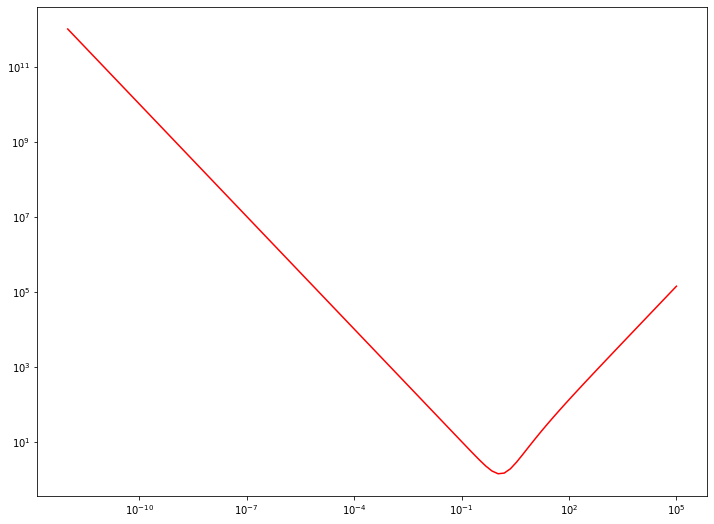

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x=1
h=np.logspace(-12,5, num=100)
df2=np.array([])
df3=np.array([])
for step in h:
    Df2=(f(x+step)-f(x))/step
    df2=np.append(df2,Df2)
    Df3=(-1.5**f(x)+2*f(x+step)-0.5*f(x+2*step))/step
    df3=np.append(df3,Df3)
err2=np.abs(np.ones(100)*fder(x)-df2)
err3=np.abs(np.ones(100)*fder(x)-df3)
h2_ind=list(err2).index(np.min(err2))
h3_ind=list(err3).index(np.min(err3))
h2=h[h2_ind]
h3=h[h3_ind]
plt.figure(figsize=(12,9))
plt.loglog(h, err3, 'r-')
print('Для двухточечной схемы: h={}'.format(h2))
print('Для трехточечной схемы: h={}'.format(h3))


### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [22]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

ValueError: math domain error

Text(0.5, 1.0, 'Зависимость ошибки от шага h в трехточечной схеме')

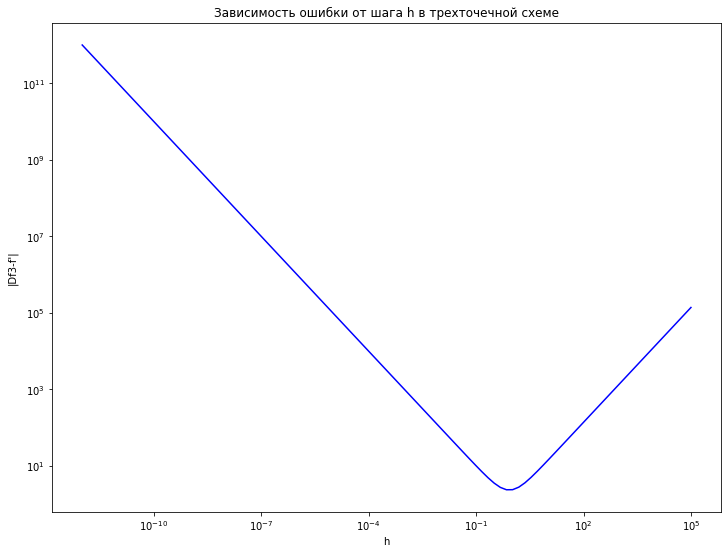

In [23]:
x=0
h_arr=np.logspace(-12,5, num=100)
df3=np.array([])
for h in h_arr:
    Df3=(-1.5**f(x)+2*f(x+h)-0.5*f(x+2*h))/h
    df3=np.append(df3,Df3)
err=np.abs(np.ones(100)*fder(x)-df3)
plt.figure(figsize=(12,9))
plt.loglog(h_arr, err, 'b-')
plt.xlabel('h')
plt.ylabel('|Df3-f\'|')
plt.title('Зависимость ошибки от шага h в трехточечной схеме')

YOUR ANSWER HERE

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [20]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    n=2
    h=(b-a)/n
    I_n=(b-a)*func((a+b)/2)
    I_n1=(func(a+0.5*h)+func(a+1.5*h))*h
    while abs(I_n1-I_n)>eps: #оценка ошибки по Рунге
        I_n=I_n1
        n=n*2
        h=(b-a)/n
        Ik_list=[]
        for n in range(1,n):
            x1=a + (n-1)*h
            x2=a + n*h
            x=(x1+x2)/2
            Ik=func(x)*h
            Ik_list.append(Ik)
        I_n1=sum(Ik_list)
    integral=I_n
    return integral, n


### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


In [32]:
def f(x):
    return (x-1)**2
eps_arr=np.logspace(-6,-1, num=7)
I0=2/3
I_arr=np.array([])
N_arr=np.array([])
error=np.array([])
for epsilon in eps_arr:
    I, N=midpoint_rule(func=lambda x:f(x), a=0, b=2, eps=epsilon)
    I_arr=np.append(I_arr,I)
    N_arr=np.append(N_arr,N)
    error=np.append(error,abs(I-I0))
print(error)

[1.90734198e-06 7.62928781e-06 6.10283272e-05 4.87844489e-04
 3.87844842e-03 2.95447589e-02 3.22916667e-01]


При всех значениях $\epsilon$ результат оказывается вне интервала заданной ошибки.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [31]:
# Способ 1: заменим нижний предел на a=1e-6
def f(x):
    return np.sin(x**0.5)/x
I, N=midpoint_rule(func=lambda x:f(x), a=1e-6, b=1, eps=1e-4)





1.8901042766329421


# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [ ]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
